# Probability and Statistics Week 8

- toc: true
- badges: true
- comments: true
- categories: [jupyter]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy import special

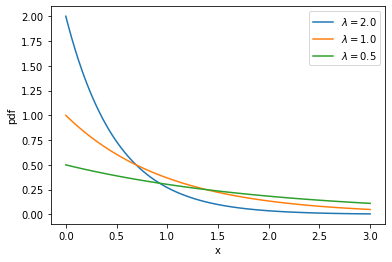

In [5]:
# exponential

for lam in [2.0, 1.0, 0.5]:
    x = np.linspace(0, 3, 100)
    y = lam * np.exp(-1 * lam * x)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

plt.show()
plt.close()

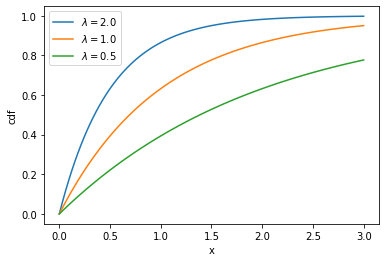

In [7]:
# exponential

for lam in [2.0, 1.0, 0.5]:
    x = np.linspace(0, 3, 100)
    y = 1 -  np.exp(-1 * lam * x)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('cdf')

plt.show()
plt.close()

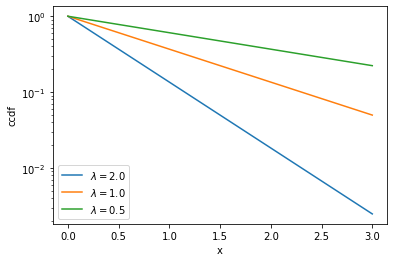

In [12]:
# exponential

for lam in [2.0, 1.0, 0.5]:
    x = np.linspace(0, 3, 100)
    y = np.exp(-1 * lam * x)
    plt.plot(x, y, label=f"$\lambda=${lam}")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('ccdf')

plt.yscale('log')
plt.show()
plt.close()

In [8]:
df = pd.read_csv('./LectureCode/babyboom.tsv', sep='\t')

In [10]:
def value2cdf(values):
    sorted_values = sorted(values)
    total = len(values)
    x = []
    y = []
    for i, value in enumerate(sorted_values):
        x.append(value)
        y.append(i / total)
    
    return x, y

In [13]:
def value2ccdf(values):
    sorted_values = sorted(values)
    total = len(values)
    x = []
    y = []
    for i, value in enumerate(sorted_values):
        x.append(value)
        y.append(1 - i / total)
    
    return x, y

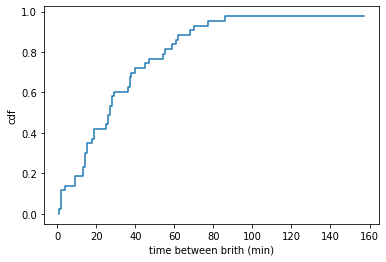

In [14]:
diffs = df['minutes'].diff().dropna()
xval, cdf = value2cdf(diffs)
plt.step(xval, cdf)
plt.xlabel('time between brith (min)')
plt.ylabel('cdf')
plt.show()
plt.close()

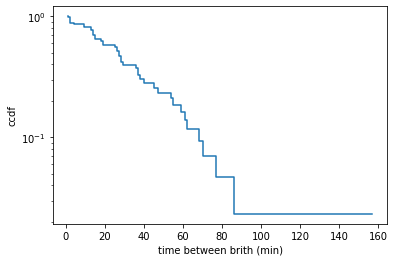

In [15]:
diffs = df['minutes'].diff().dropna()
xval, ccdf = value2ccdf(diffs)
plt.step(xval, ccdf)
plt.xlabel('time between brith (min)')
plt.ylabel('ccdf')
plt.yscale('log')
plt.show()
plt.close()

In [17]:
def value2pdf(values, bins=10):
    tot = len(values)
    hist, bins = np.histogram(values, bins=bins)
    xval = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    binsizes = (bins[1:] - bins[:-1])
    pdf = hist / (binsizes * tot)
    return xval, pdf

def value2pmf(values, bins=10):
    tot = len(values)
    hist, bins = np.histogram(values, bins=bins)
    xval = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    pmf = hist / tot
    return xval, pmf


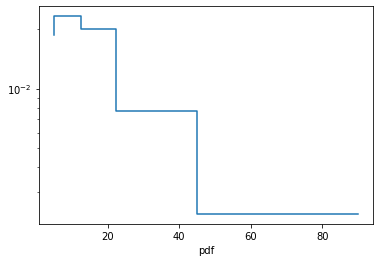

In [21]:
xval, pdf = value2pdf(diffs, [0, 10, 15, 30, 60, 120])
plt.step(xval, pdf)
plt.xlabel('time between births (min)')
plt.xlabel('pdf')
plt.yscale('log')
plt.show()
plt.close()

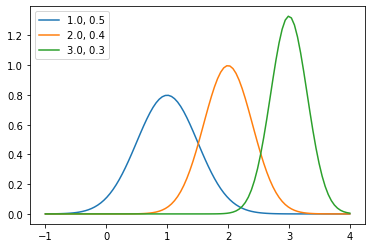

In [30]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    x = np.linspace(-1, 4, 100)
    y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - mu) / sigma) ** 2)
    plt.plot(x, y, label=f"{mu}, {sigma}")

plt.legend()
plt.show()
plt.close()

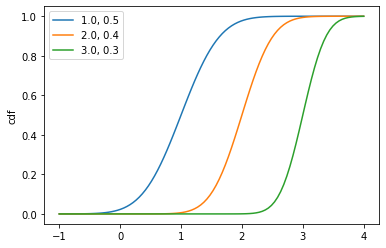

In [24]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    x = np.linspace(-1, 4, 100)
    y = 1 / 2 * (1 + special.erf((x - mu) / (sigma * np.sqrt(2))))
    plt.plot(x, y, label=f"{mu}, {sigma}")

plt.legend()
plt.ylabel('cdf')
plt.show()
plt.close()

In [25]:
preg = pd.read_csv('./LectureCode/2002FemPreg.tsv', sep='\t')
weights = preg['totalwgt_lb'].dropna()

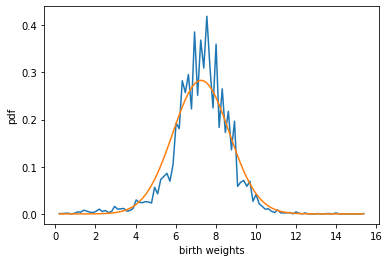

In [32]:
x, pdf = value2pdf(weights, 100)
plt.plot(x, pdf, label='data')

mean = np.mean(weights)
std = np.sqrt(np.var(weights))
model_x = x
model_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((model_x - mean) / std) ** 2)
plt.plot(model_x, model_pdf, label='model')

plt.xlabel('birth weights')
plt.ylabel('pdf')
plt.show()
plt.close()

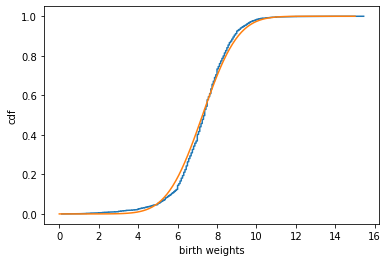

In [35]:
x, cdf = value2cdf(weights)
plt.plot(x, cdf, label='data')

mean = np.mean(weights)
std = np.sqrt(np.var(weights))
model_x = np.linspace(0, 15, 100)
model_cdf = 1 / 2 * (1 + special.erf((model_x - mean) / (std * np.sqrt(2))))
plt.plot(model_x, model_cdf, label='model')

plt.xlabel('birth weights')
plt.ylabel('cdf')
plt.show()
plt.close()

In [36]:
trimmed_weights = sorted(weights)[int(0.01 * len(weights)):int((1 - 0.01) * len(weights))]

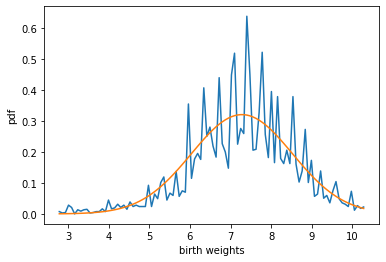

In [37]:
x, pdf = value2pdf(trimmed_weights, 100)
plt.plot(x, pdf, label='data')

mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))
model_x = x
model_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((model_x - mean) / std) ** 2)
plt.plot(model_x, model_pdf, label='model')

plt.xlabel('birth weights')
plt.ylabel('pdf')
plt.show()
plt.close()

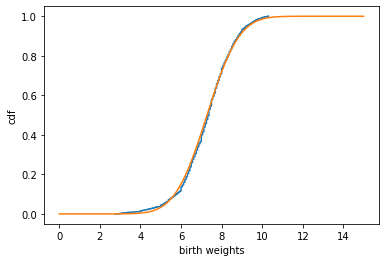

In [38]:
x, cdf = value2cdf(trimmed_weights)
plt.plot(x, cdf, label='data')

mean = np.mean(trimmed_weights)
std = np.sqrt(np.var(trimmed_weights))
model_x = np.linspace(0, 15, 100)
model_cdf = 1 / 2 * (1 + special.erf((model_x - mean) / (std * np.sqrt(2))))
plt.plot(model_x, model_cdf, label='model')

plt.xlabel('birth weights')
plt.ylabel('cdf')
plt.show()
plt.close()

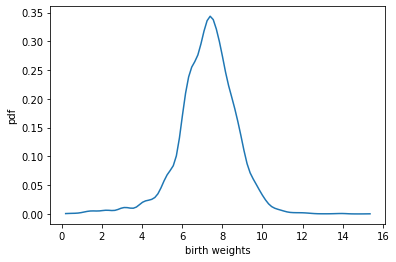

In [39]:
x, pdf = value2pdf(weights, 100)
# plt.plot(x, pdf, label='data')

mean = np.mean(weights)
std = np.sqrt(np.var(weights))
# model_x = x
# model_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((model_x - mean) / std) ** 2)
# plt.plot(model_x, model_pdf, label='model')

estimator = stats.gaussian_kde(weights)
K = estimator(x)
plt.plot(x, K, label='kde')

plt.xlabel('birth weights')
plt.ylabel('pdf')
plt.show()
plt.close()

No handles with labels found to put in legend.


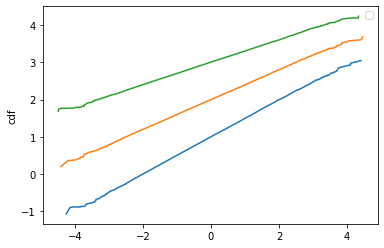

In [41]:
n = 100000
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    std_sample = np.random.normal(0, 1, n)
    sample = np.random.normal(mu, sigma, n)
    plt.plot(sorted(std_sample), sorted(sample))

plt.legend()
plt.ylabel('cdf')
plt.show()
plt.close()

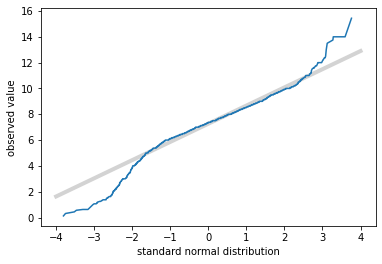

In [48]:
mean = np.mean(weights)
std = np.sqrt(np.var(weights))

xs = [-4, 4]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color='lightgrey', linewidth=4)

sample_xs = np.random.normal(0, 1, len(weights))
plt.plot(sorted(sample_xs), sorted(weights))

plt.xlabel('standard normal distribution')
plt.ylabel('observed value')
plt.show()
plt.close()

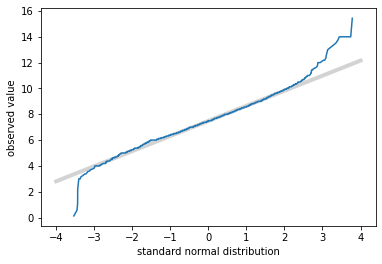

In [46]:
full_term = preg[preg['prglngth'] >= 37]
term_weights = full_term['totalwgt_lb'].dropna()

mean = np.mean(term_weights)
std = np.sqrt(np.var(term_weights))

xs = [-4, 4]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color='lightgrey', linewidth=4)

sample_xs = np.random.normal(0, 1, len(term_weights))
plt.plot(sorted(sample_xs), sorted(term_weights))

plt.xlabel('standard normal distribution')
plt.ylabel('observed value')
plt.show()
plt.close()

In [50]:
df = pd.read_csv('./LectureCode/BRFSS.tsv', sep='\t')
weights = df['wtkg2'].dropna()

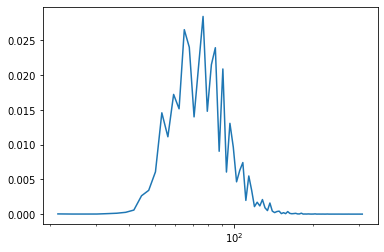

In [53]:
x, pdf = value2pdf(weights, 100)
plt.plot(x, pdf)
plt.xscale('log')

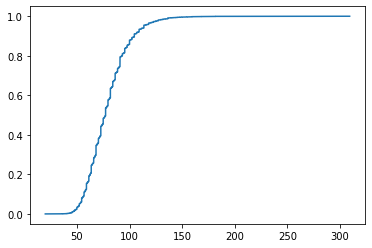

In [52]:
x, cdf = value2cdf(weights)
plt.plot(x, cdf)

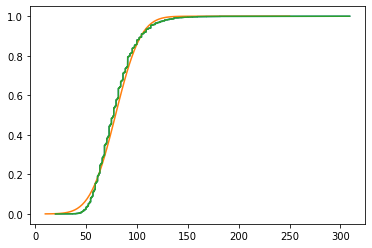

In [55]:
x, cdf = value2cdf(weights)
plt.plot(x, cdf)
mean = np.mean(weights)
std = np.sqrt(np.var(weights))
model_x = np.linspace(10, 250, 100)
model_cdf = 1 / 2 * (1 + special.erf((model_x - mean) / (std * np.sqrt(2))))
plt.plot(model_x, model_cdf)
plt.plot(x, cdf)

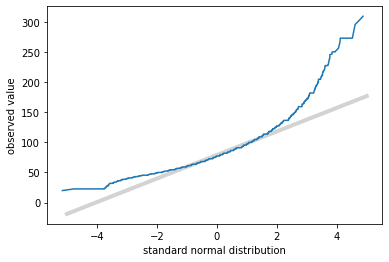

In [56]:
mean = np.mean(weights)
std = np.sqrt(np.var(weights))

xs = [-5, 5]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color='lightgrey', linewidth=4)
sample_xs = np.random.normal(0, 1, len(weights))
plt.plot(sorted(sample_xs), sorted(weights))

plt.xlabel('standard normal distribution')
plt.ylabel('observed value')
plt.show()
plt.close()

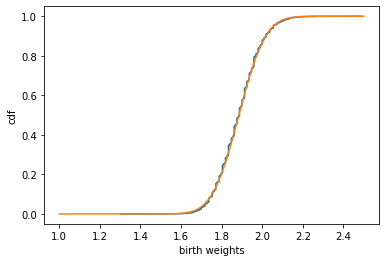

In [59]:
x, cdf = value2cdf(np.log10(weights))
plt.plot(x, cdf, label='data')

mean = np.mean(np.log10(weights))
std = np.sqrt(np.var(np.log10(weights)))
model_x = np.linspace(1, 2.5, 100)
model_cdf = 1 / 2 * (1 + special.erf((model_x - mean) / (std * np.sqrt(2))))
plt.plot(model_x, model_cdf, label='model')

plt.xlabel('birth weights')
plt.ylabel('cdf')
plt.show()
plt.close()

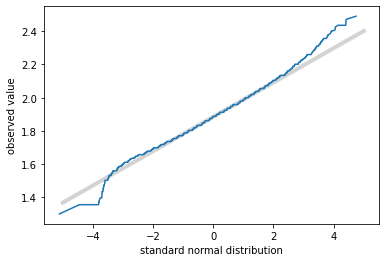

In [60]:
mean = np.mean(np.log10(weights))
std = np.sqrt(np.var(np.log10(weights)))

xs = [-5, 5]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color='lightgrey', linewidth=4)
sample_xs = np.random.normal(0, 1, len(np.log10(weights)))
plt.plot(sorted(sample_xs), sorted(np.log10(weights)))

plt.xlabel('standard normal distribution')
plt.ylabel('observed value')
plt.show()
plt.close()

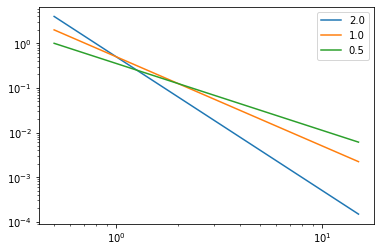

In [64]:
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 100)
    model_pdf = alpha * (xmin ** alpha) / (model_x ** (alpha + 1))
    plt.plot(model_x, model_pdf, label=alpha)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
plt.close()

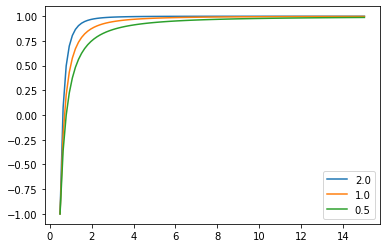

In [65]:
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 100)
    model_cdf = 1 - (xmin ** alpha) / (model_x ** (alpha + 1))
    plt.plot(model_x, model_cdf, label=alpha)

# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()
plt.close()

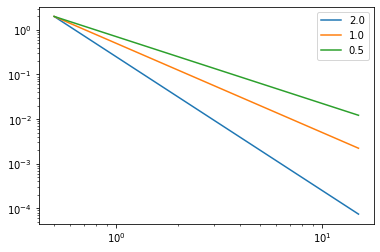

In [66]:
xmin = 0.5
for alpha in [2.0, 1.0, 0.5]:
    model_x = np.linspace(0.5, 15, 100)
    model_ccdf = (xmin ** alpha) / (model_x ** (alpha + 1))
    plt.plot(model_x, model_ccdf, label=alpha)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [67]:
pops = pd.read_csv('./LectureCode/PEP_2012_PEPANNRES_with_ann.tsv', sep='\t')['Populations']

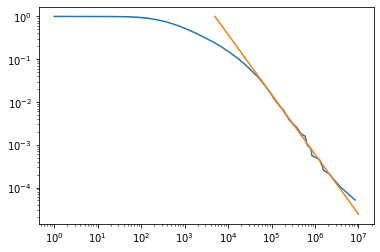

In [73]:
x, ccdf = value2ccdf(pops.values)
plt.plot(x, ccdf, label='data')
plt.xscale('log')
plt.yscale('log')

alpha = 1.4
xmin = 5000
model_x = np.linspace(xmin, 1e07, 100)
model_ccdf = xmin ** alpha / model_x ** alpha

plt.plot(model_x, model_ccdf)
plt.show()
plt.close()


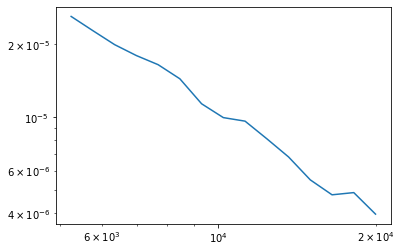

In [76]:
x, pdf = value2pdf(pops.values, [5000 * 1.1 ** x for x in range(16)])
plt.plot(x, pdf, label='data')
plt.xscale('log')
plt.yscale('log')

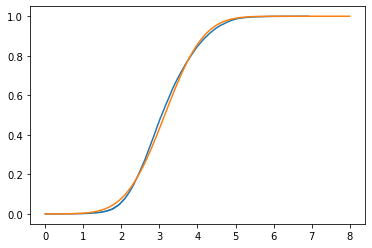

In [77]:
log10_pops = np.log10(pops)
x, cdf = value2cdf(log10_pops)

mean = np.mean(log10_pops)
std = np.sqrt(np.var(log10_pops))
model_x = np.linspace(0, 8, 100)
model_cdf = 1 / 2 * (1 + special.erf((model_x - mean) / (std * np.sqrt(2))))

plt.plot(x, cdf)
plt.plot(model_x, model_cdf)

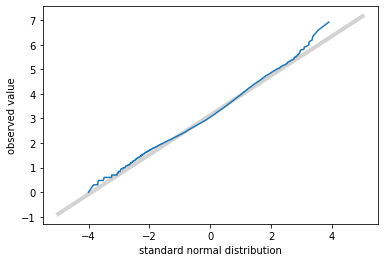

In [78]:
mean = np.mean(log10_pops)
std = np.sqrt(np.var(log10_pops))

xs = [-5, 5]
guide_xs = np.sort(xs)
guide_ys = mean + std * guide_xs
plt.plot(guide_xs, guide_ys, color='lightgrey', linewidth=4)
sample_xs = np.random.normal(0, 1, len(log10_pops))
plt.plot(sorted(sample_xs), sorted(log10_pops))

plt.xlabel('standard normal distribution')
plt.ylabel('observed value')
plt.show()
plt.close()

In [79]:
def RawMoment(xs, k):
    return sum(x ** k for x in xs) / len(xs)

In [80]:
df = pd.read_csv('./LectureCode/BRFSS.tsv', sep='\t')

In [84]:
female = df[df['sex'] == 2]
female_heights = female['htm3'].dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

(163.22347500412215, 7.269156286642232)

In [85]:
RawMoment(female_heights, 1)

163.22347500412215

In [90]:
def CentralMonent(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean) ** k for x in xs) / len(xs)

In [91]:
np.sqrt(CentralMonent(female_heights, 2))

7.269142017823925